Príklad použitia STA algoritmu v našej knižnici a porovanie výsledkov s implementáciou tohoto algoritmu vo webovej aplikácii ScanPath Evaulator https://scanpath-evaluator.herokuapp.com/

Načítame jednotlivé moduly v tomto prípade nám bude stačiť trieda Dataset a trieda STA. Zvyšné moduly sú z hľadiska našej knižnice nepodstátne.

In [2]:
import os
os.getcwd()
os.chdir('C:/Users/zuhi/Documents/workspaces/scikit-gaze/')
from src.core.Dataset import Dataset
from src.common_scanpath.STA import STA
from IPython.display import Image


Vytvoríme inštanciu triedy Dataset a načítame volne dostupnú dátovu sadu z článku *Scanpath Trend Analysis on Web Pages: Clustering Eye Tracking Scanpaths*. Táto konkrétna dátová sada mala pôvodne slúžiť na testovanie algoritmu eMine na stránke AVG, no pre ukážku výsledkov nám postačí.

In [3]:
dataset = Dataset('./data/template_sta/eMINE_searching_tasks/AVG/Scanpaths.tsv',
'./data/template_sta/eMINE_searching_tasks/AVG/SegmentedPages.txt',filtered_dataset=True)

V tomto kroku jednoducho pošleme do triedy STA našu dátovú sadu a zavoláme metódu run_sta().

In [4]:
sta_result = STA(dataset).run_sta()


Pre porovnanie výsledkov si vypočítame priemernú podobnosť sekvencií pohľadu jednotlivých participantov k spoločnej sekvencií pohľadu.

In [5]:
avg_similarity = 0
for key, value in sta_result["similarity"].items():
    avg_similarity += value

avg_similarity /= len(sta_result["similarity"])

Ako si možeme všimnúť algoritmus STA našiel spoločnú sekvenciu pohľadu G I H B ktorá je identická s tou ktorú našla webová aplikácia ScanPath Evaulator. Avšak trvania jednotlivých fixácií je značne rozdielne čo má za dôsledok aj inú podobnosť voči ostatným participantom.

In [6]:
sta_result['fixations']

[['G', 314], ['I', 319], ['H', 228], ['B', 247]]

In [7]:
avg_similarity

4.12336226198651

Výsledok v aplikácií ScanPath Evaulator.

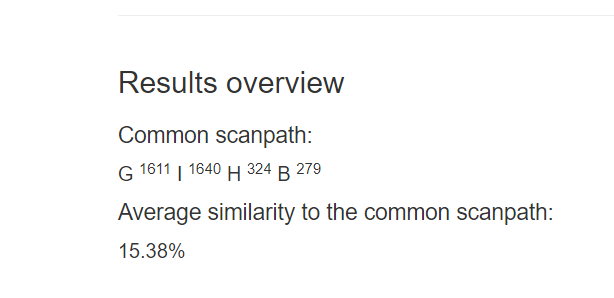

In [8]:
Image("./data/images/avg-searching-sta.png")